In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [2]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

In [3]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


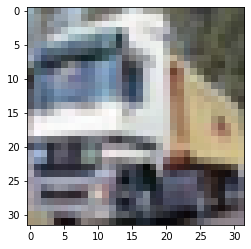

In [4]:
plt.imshow(X_train[1])

In [5]:
classes = ['aeroplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
Y_train[1]

array([9], dtype=uint8)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


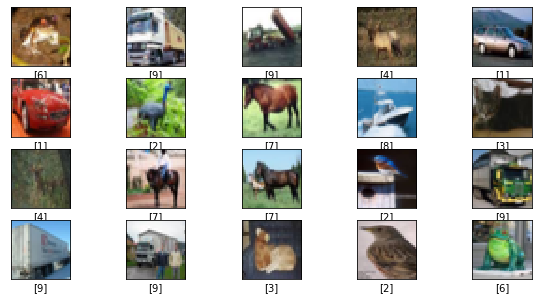

In [7]:
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(Y_train[i])
plt.show()

In [8]:
X_train = X_train /255
X_test = X_test/ 255

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Flatten,Dropout
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D


In [10]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(Y_train.shape)

(50000, 10)


In [11]:
model =Sequential()
model.add(Conv2D(64,(2,2),strides =(1,1), activation ='relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D((2,2),strides=(1,1)))
model.add(Dropout(rate =0.25))
model.add(Conv2D(32,(2,2),strides =(1,1), activation = 'relu'))
model.add(MaxPooling2D((2,2),strides=(1,1)))
model.add(Dropout(rate =0.25))
model.add(Flatten())
model.add(Dense(256,activation ='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(Y_train.shape[1],activation = 'softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,Y_train, epochs = 10, validation_data=(X_test,Y_test), batch_size = 64)

Epoch 1/10
782/782 [==============================] - 458s 585ms/step - loss: 1.7884 - accuracy: 0.3510 - val_loss: 1.4159 - val_accuracy: 0.4882
Epoch 2/10
782/782 [==============================] - 461s 589ms/step - loss: 1.4714 - accuracy: 0.4695 - val_loss: 1.2883 - val_accuracy: 0.5474
Epoch 3/10
782/782 [==============================] - 455s 582ms/step - loss: 1.3494 - accuracy: 0.5155 - val_loss: 1.2134 - val_accuracy: 0.5794
Epoch 4/10
782/782 [==============================] - 490s 627ms/step - loss: 1.2630 - accuracy: 0.5471 - val_loss: 1.0865 - val_accuracy: 0.6226
Epoch 5/10
782/782 [==============================] - 485s 620ms/step - loss: 1.1935 - accuracy: 0.5756 - val_loss: 1.0464 - val_accuracy: 0.6324
Epoch 6/10
782/782 [==============================] - 476s 609ms/step - loss: 1.1492 - accuracy: 0.5878 - val_loss: 1.0184 - val_accuracy: 0.6417
Epoch 7/10
782/782 [==============================] - 470s 601ms/step - loss: 1.1060 - accuracy: 0.6019 - val_loss: 1.0412 -

In [14]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 16s 51ms/step - loss: 0.9563 - accuracy: 0.6642


[0.95632004737854, 0.6642000079154968]

In [15]:
prediction = model.predict(X_test)

In [16]:
prediction[0]

array([5.0068379e-04, 2.9492701e-05, 1.8752612e-02, 5.1392698e-01,
       1.3580441e-03, 4.1340953e-01, 4.7147613e-02, 3.2999183e-03,
       1.2957677e-03, 2.7936685e-04], dtype=float32)

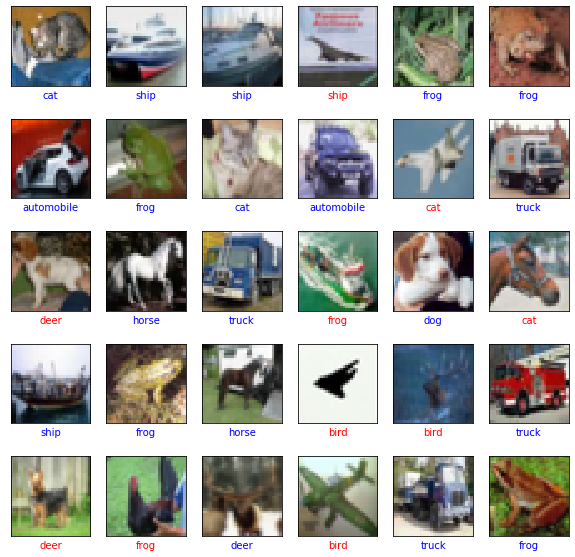

In [17]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    col = 'blue' if np.argmax(prediction[i]) == np.argmax(Y_test[i]) else 'red'
    plt.xlabel(classes[np.argmax(prediction[i])], color = col)
plt.show()

In [25]:
model.save(r'C:\Users\User\Desktop\Cifar10')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\Users\User\Desktop\Cifar10\assets
